# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

# Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Funcs

In [15]:
def sigmoid(x):
    """Сигмоида"""
    return 1 / (1 + np.exp(-x))


def identity(x):
    """Тождественная функция активации"""
    return x


def unit_step(x):
    """Единичная ступенька"""
    return np.greater_equal(x, 0)


def tanh_activation(x):
    """Гиперболический тангенс"""
    return np.tanh(x)


def arctan_activation(x):
    """Арктангенс"""
    return np.arctan(x)

def relu_activation(x):
    """ReLU"""
    return np.maximum(0, x)

In [16]:
activation_functions = [
    (identity, "Identity"),
    (unit_step, "Unit step"),
    (sigmoid, "Sigmoid"),
    (tanh_activation, "Tanh"),
    (arctan_activation, "Arctan"),
    (relu_activation, "ReLU")
]

# Data

In [17]:
SIZE = int(1e3)
SEED = 45

In [18]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0] * SIZE + [1] * SIZE)


w = np.random.randn(2)
b = 0.0

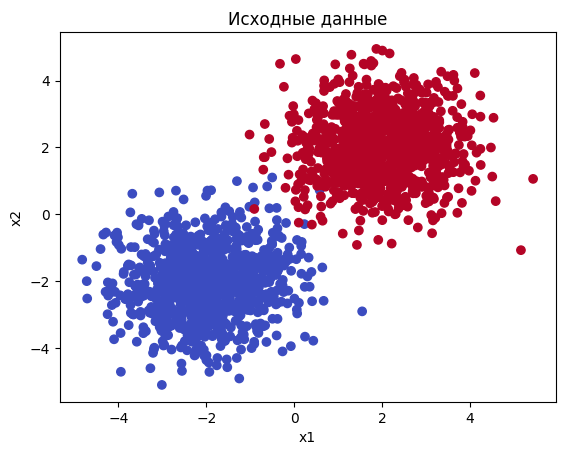

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Исходные данные")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Neuron

In [20]:
def neuron_output(X, w, b, activation_function):
    z = np.dot(X, w) + b
    return activation_function(z)

In [21]:
def plot_decision_boundary(w, b, activation_function, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, activation_function)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

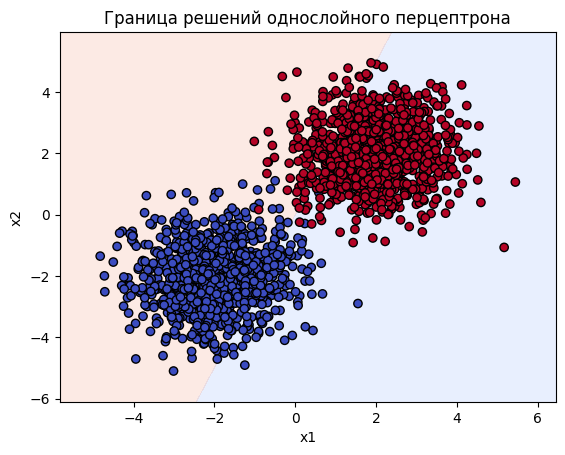

In [22]:
plot_decision_boundary(w, b, sigmoid, "Граница решений однослойного перцептрона")

# Training

In [23]:
def train_perceptron(X, y, activation_function, activation_name, 
                    learning_rate=0.1, epochs=10):
    """
    Обучение перцептрона с заданной функцией активации
    """
    w = np.random.randn(2)
    b = 0.0
    losses = []
    accuracies = []
    
    print(f"\n--- Обучение с функцией активации: {activation_name} ---")
    
    for epoch in range(epochs):
        epoch_errors = 0
        for i in range(len(X)):
            # Прямой проход
            z = np.dot(X[i], w) + b
            if activation_function == unit_step:
                y_pred = 1 if z >= 0 else 0
            else:
                output = activation_function(z)
                y_pred = 1 if output >= 0.5 else 0
            
            # Ошибка и обновление весов
            error = y[i] - y_pred
            w += learning_rate * error * X[i]
            b += learning_rate * error
            epoch_errors += abs(error)
        
        # Расчет точности после эпохи
        outputs = neuron_output(X, w, b, activation_function)
        if activation_function == unit_step:
            preds = (outputs > 0).astype(int)
        else:
            preds = (outputs > 0.5).astype(int)
        
        acc = (preds == y).mean()
        accuracies.append(acc)
        losses.append(epoch_errors / len(X))
        
        # print(f"Эпоха {epoch+1}/{epochs} - точность: {acc:.4f}, ошибка: {losses[-1]:.4f}")
    
    return w, b, losses, accuracies

In [24]:
LEARNING_RATE = 0.01
EPOCHS = 50


--- Обучение с функцией активации: Identity ---

--- Обучение с функцией активации: Unit step ---

--- Обучение с функцией активации: Sigmoid ---

--- Обучение с функцией активации: Tanh ---

--- Обучение с функцией активации: Arctan ---

--- Обучение с функцией активации: ReLU ---


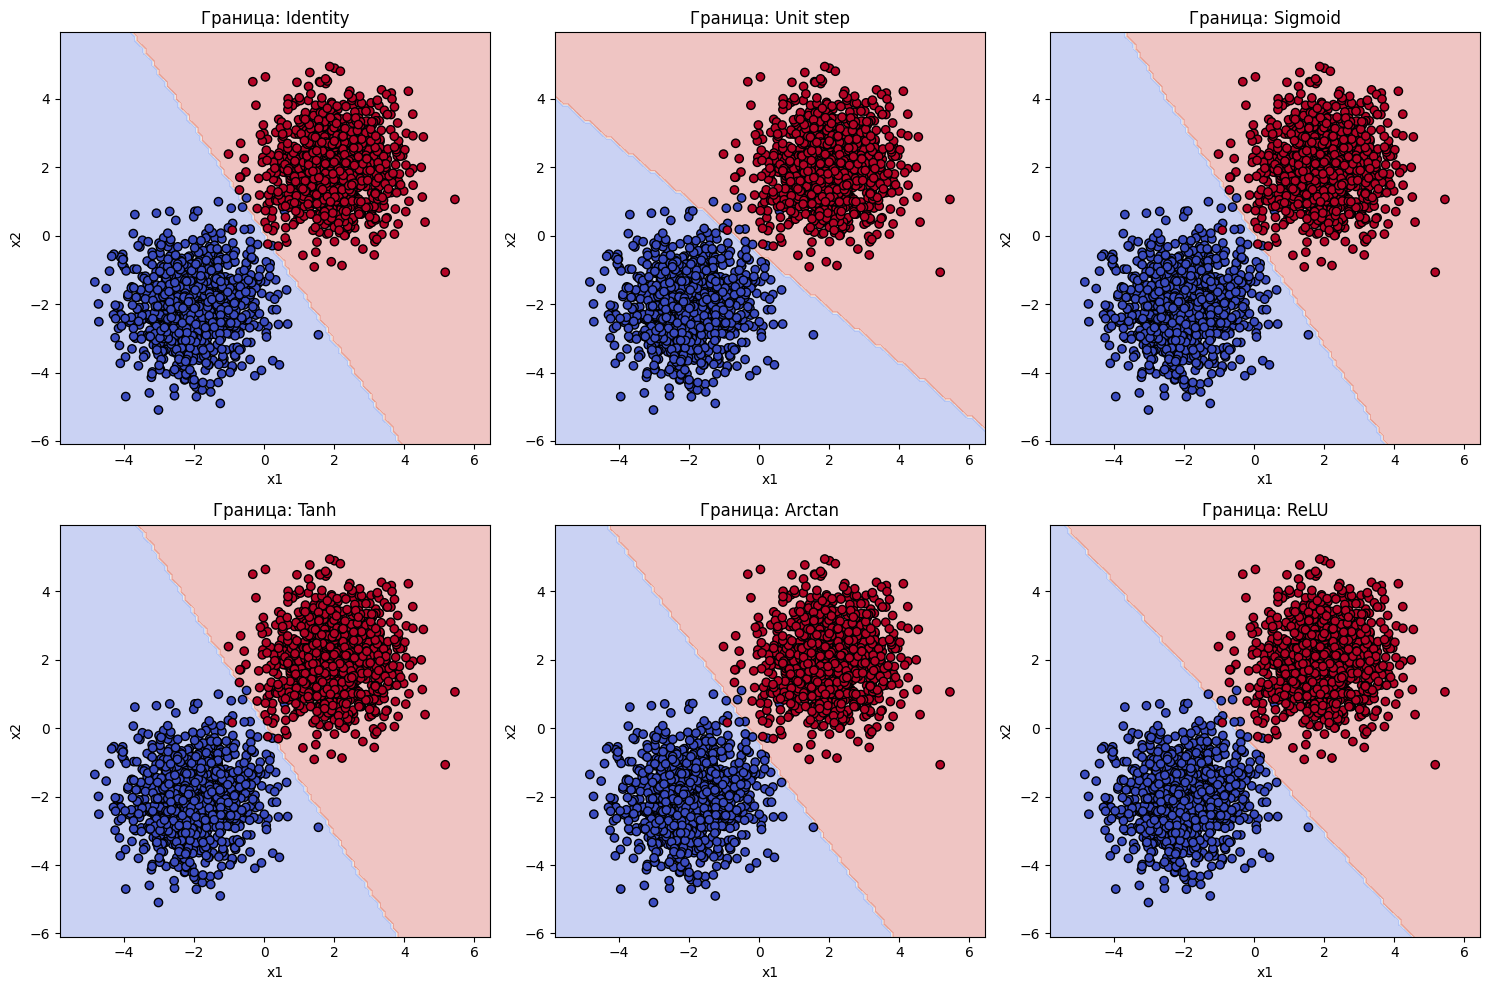

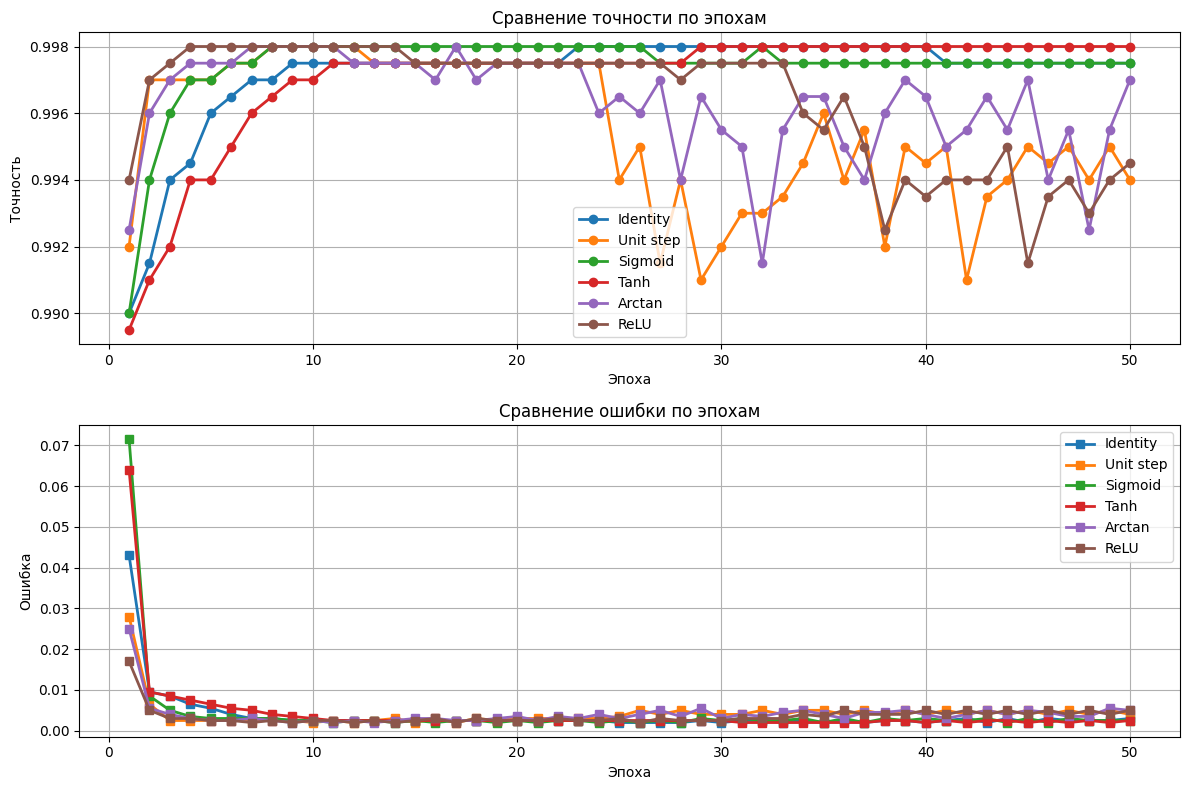

In [25]:
results = {}

plt.figure(figsize=(15, 10))

for i, (act_func, act_name) in enumerate(activation_functions, 1):
    # Обучение
    w, b, losses, accuracies = train_perceptron(
        X, y, act_func, act_name, LEARNING_RATE, EPOCHS
    )

    results[act_name] = {
        "weights": w,
        "bias": b,
        "losses": losses,
        "accuracies": accuracies,
    }

    # Визуализация границы решений
    plt.subplot(2, 3, i)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, act_func)
    if act_func == unit_step:
        Z = (Z > 0).astype(float)
    else:
        Z = (Z > 0.5).astype(float)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(f"Граница: {act_name}")
    plt.xlabel("x1")
    plt.ylabel("x2")

plt.tight_layout()
plt.show()

# Сравнение кривых обучения
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for act_name, result in results.items():
    plt.plot(
        range(1, EPOCHS + 1),
        result["accuracies"],
        marker="o",
        label=act_name,
        linewidth=2,
    )
plt.title("Сравнение точности по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for act_name, result in results.items():
    plt.plot(
        range(1, EPOCHS + 1), result["losses"], marker="s", label=act_name, linewidth=2
    )
plt.title("Сравнение ошибки по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
print("=" * 50)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ")
print("=" * 50)

for act_name, result in results.items():
    final_accuracy = result["accuracies"][-1]
    final_loss = result["losses"][-1]
    print(f"{act_name:20} | Точность: {final_accuracy:.4f} | Ошибка: {final_loss:.4f}")

print("\n" + "=" * 50)
print("ДЕМОНСТРАЦИЯ ВЫХОДОВ НЕЙРОНА")
print("=" * 50)

test_points = [
    (np.array([-2, -2]), "Класс 0"),
    (np.array([2, 2]), "Класс 1"),
    (np.array([0, 0]), "Пограничная"),
]

for point, descr in test_points:
    print(f"\nТочка {point}:\t {descr}")
    for act_name, result in results.items():
        act_func = [func for func, name in activation_functions if name == act_name][0]
        output = neuron_output(point, result["weights"], result["bias"], act_func)
        prediction = 1 if (output > 0.5 if act_func != unit_step else output > 0) else 0
        print(f"  {act_name:20} | Выход: {output:7.4f} | Предсказание: {prediction}")

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ
Identity             | Точность: 0.9975 | Ошибка: 0.0030
Unit step            | Точность: 0.9940 | Ошибка: 0.0040
Sigmoid              | Точность: 0.9975 | Ошибка: 0.0025
Tanh                 | Точность: 0.9980 | Ошибка: 0.0025
Arctan               | Точность: 0.9970 | Ошибка: 0.0050
ReLU                 | Точность: 0.9945 | Ошибка: 0.0050

ДЕМОНСТРАЦИЯ ВЫХОДОВ НЕЙРОНА

Точка [-2 -2]:	 Класс 0
  Identity             | Выход: -0.6293 | Предсказание: 0
  Unit step            | Выход:  0.0000 | Предсказание: 0
  Sigmoid              | Выход:  0.3073 | Предсказание: 0
  Tanh                 | Выход: -0.9271 | Предсказание: 0
  Arctan               | Выход:  0.3893 | Предсказание: 0
  ReLU                 | Выход:  0.3782 | Предсказание: 0

Точка [2 2]:	 Класс 1
  Identity             | Выход:  1.6093 | Предсказание: 1
  Unit step            | Выход:  1.0000 | Предсказание: 1
  Sigmoid              | Выход:  0.6927 | Предсказание: 1
  Tanh                 | Выход:  0.98

# Questions

## 1. Что делает функция активации в искусственном нейроне


Функция активации главным образом вводит нелинейность (a. k. a. допускает наличие сложных зависимостей).

Дополнительно она определяет выход нейрона на основе его взвешенных входов.


## 2. Чем отличается искусственный нейрон от однослойного перцептрона?


Перцептрон - сеть из искуственных нейронов.

В случае однослойного:
1. Каждый нейрон имеет свои веса и смещение

2. Все нейроны получают одни и те же входные данные

3. Выход - вектор (по одному значению от каждого нейрона)

## 3. Какое правило используется для обучения перцептрона?


Используется дельта-правило — метод обучения перцептрона по принципу градиентного спуска по поверхности ошибки.

## 4. Почему однослойный перцептрон не может решить задачу XOR?


Однослойный перцептрон может строить только линейные границы решений (прямые линии в 2D)

## 5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


Будет тоже хороший результат, но:

Во-первых, при использовании ReLU, некоторые нейроны могут "умереть" (dead neurons), т.е. они могут получить отрицательное значение и оставаться неактивными на всем протяжении обучения.

Во-вторых, ReLU несимметрична относительно нуля, поэтому может возникнуть проблема "расслоения" (clustering), когда нейроны могут выдавать только положительные значения.

Зато вычисляется быстрее!